In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('data/TSLA.csv')

In [9]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,3.800,5.000,3.508,4.778,4.778,93831500
1,2010-06-30,5.158,6.084,4.660,4.766,4.766,85935500
2,2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000
3,2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000
4,2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500


In [10]:
df.shape

(2685, 7)

In [15]:
df.loc[0, 'Date'].day_name()

AttributeError: 'str' object has no attribute 'day_name'

In [18]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

In [21]:
do = df.loc[0, 'Date']

In [32]:
do.day_name()

'Tuesday'

In [36]:
import datetime

In [40]:
do = datetime.datetime.strptime('2020-02-16', '%Y-%m-%d')

In [45]:
d_parser = lambda x: datetime.datetime.strptime(x, '%Y-%m-%d')
df = pd.read_csv('data/TSLA.csv', parse_dates=['Date'], date_parser=d_parser)

In [57]:
df['DoW'] = df['Date'].apply(lambda x: x.strftime("%A"))

In [59]:
df['Date'].dt.day_name()

0         Tuesday
1       Wednesday
2        Thursday
3          Friday
4         Tuesday
          ...    
2680       Monday
2681      Tuesday
2682    Wednesday
2683     Thursday
2684       Friday
Name: Date, Length: 2685, dtype: object

In [62]:
df.drop(columns=['DoW'], inplace=True)

KeyError: "['DoW'] not found in axis"

In [63]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,3.800000,5.000000,3.508000,4.778000,4.778000,93831500
1,2010-06-30,5.158000,6.084000,4.660000,4.766000,4.766000,85935500
2,2010-07-01,5.000000,5.184000,4.054000,4.392000,4.392000,41094000
3,2010-07-02,4.600000,4.620000,3.742000,3.840000,3.840000,25699000
4,2010-07-06,4.000000,4.000000,3.166000,3.222000,3.222000,34334500
...,...,...,...,...,...,...,...
2680,2021-02-22,762.640015,768.500000,710.200012,714.500000,714.500000,37011700
2681,2021-02-23,662.130005,713.609985,619.000000,698.840027,698.840027,66397000
2682,2021-02-24,711.849976,745.000000,694.169983,742.020020,742.020020,36677100
2683,2021-02-25,726.150024,737.210022,670.580017,682.219971,682.219971,38619900


In [64]:
df['Date'].max() - df['Date'].min()

Timedelta('3895 days 00:00:00')

In [70]:
filt = (df['Date'] >= pd.to_datetime('2020-01-01')) & (df['Date'] < pd.to_datetime('2021-01-01'))

In [71]:
df.loc[filt]

,Date,Open,High,Low,Close,Adj Close,Volume
2394,2020-01-02,84.900002,86.139999,84.342003,86.052002,86.052002,47660500
2395,2020-01-03,88.099998,90.800003,87.384003,88.601997,88.601997,88892500
2396,2020-01-06,88.094002,90.311996,88.000000,90.307999,90.307999,50665000
2397,2020-01-07,92.279999,94.325996,90.671997,93.811996,93.811996,89410500
2398,2020-01-08,94.739998,99.697998,93.646004,98.428001,98.428001,155721500
...,...,...,...,...,...,...,...
2642,2020-12-24,642.989990,666.090027,641.000000,661.770020,661.770020,22865600
2643,2020-12-28,674.510010,681.400024,660.799988,663.690002,663.690002,32278600
2644,2020-12-29,661.000000,669.900024,655.000000,665.989990,665.989990,22910800
2645,2020-12-30,672.000000,696.599976,668.359985,694.780029,694.780029,42846000


In [73]:
df.set_index('Date', inplace=True)

In [81]:
low_by_month = df['Low'].resample("M").min()

<AxesSubplot:xlabel='Date'>

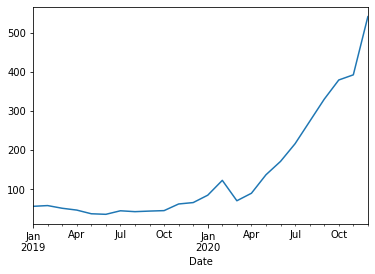

In [82]:
low_by_month['2019':'2020'].plot()

In [88]:
df.resample('M').mean() # this does no make sense

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-30,4.479000,5.542000,4.084000,4.772000,4.772000,8.988350e+07
2010-07-31,4.014667,4.128000,3.763238,3.911619,3.911619,1.537519e+07
2010-08-31,3.909091,3.982000,3.816091,3.902182,3.902182,3.417773e+06
2010-09-30,4.155810,4.255238,4.061810,4.148095,4.148095,4.296643e+06
2010-10-31,4.144667,4.198571,4.085143,4.142667,4.142667,1.559000e+06
...,...,...,...,...,...,...
2020-10-31,430.490458,436.831822,421.228180,427.209545,427.209545,3.790146e+07
2020-11-30,464.273001,476.083501,453.335501,465.612498,465.612498,3.912994e+07
2020-12-31,631.504095,647.822726,615.457725,638.818639,638.818639,5.439897e+07


In [89]:
def give_first(ser):
    return ser.iloc[0]

In [102]:
def give_last(ser):
    return ser.iloc[-1]

In [103]:
df_monthly = df.resample('M').agg({'Open':give_first, 'High':'max', 'Low':'min', 'Volume':'sum', 'Close':give_last, 'Adj Close':give_last })

In [104]:
df_monthly

,Open,High,Low,Volume,Close,Adj Close
Date,,,,,,
2010-06-30,3.800000,6.084000,3.508000,179767000,4.766000,4.766000
2010-07-31,5.000000,5.184000,2.996000,322879000,3.988000,3.988000
2010-08-31,4.100000,4.436000,3.478000,75191000,3.896000,3.896000
2010-09-30,3.924000,4.632000,3.900000,90229500,4.082000,4.082000
2010-10-31,4.138000,4.374000,4.000000,32739000,4.368000,4.368000
...,...,...,...,...,...,...
2020-10-31,440.760010,465.899994,379.109985,833832100,388.040009,388.040009
2020-11-30,394.000000,607.799988,392.299988,782598800,567.599976,567.599976
2020-12-31,597.590027,718.719971,541.210022,1196777400,705.669983,705.669983
